# Time to reach a location
The aim of this notebook is to compute the time it takes a soccer player to reach a location on the field with three different approach

# Table of Content
- [Simple approximation](#simple_approx)
- [Using equations of motion](#improved_approx)
- [Discussion of speed and acceleration values](#speed-discussion)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Simple approximation <a name="simple_approx"></a>

The process is broken down into two stages :
 
* First, there is an intinial reaction time roughly determined as vmax/amax.
    
* Then the player runs towards the target location at their maximum speed vmax.

In his study [Off the ball scoring opportunities](/Users/gabin/Ordinateur/Documents/Informatique/ressources/football/off_the_ball_scoring_opportunities.pdf), Spearman suggests that vmax and amax should respectively be set at $5m/s$ and $7m/s^2$. We will discuss these values later

In [38]:
def simple_time_to_reach_location(location=np.array([20,10]),position=np.array([0,0]),amax=7,vmax=5,velocity=np.array([1,2])):
    
    reaction_time=vmax/amax
    
    r_reaction = position + velocity*reaction_time
    arrival_time = reaction_time + np.linalg.norm(location-r_reaction)/vmax

    return(arrival_time)

In [4]:
def print_path(location=np.array([20,10]),position=np.array([0,0]),amax=7,vmax=5,velocity=np.array([1,2]),figax=None,nb_points=50,color='blue'):
    
    if figax==None:
        fig,ax=plt.subplots(1,3,figsize=(20,10))
        ax[0].plot(location[0],location[1], 'ro',label='location to reach',markersize=10)
        ax[0].plot(position[0],position[1], 'bx',label='position',markersize=10)
        ax[1].set_ylabel('speed m/s')
        ax[1].set_xlabel('time s')
        ax[2].set_ylabel('distance to location m')
        ax[2].set_xlabel('time s')
        ax[0].legend()
    else:
        fig,ax=figax
        
    tf=simple_time_to_reach_location(location=location,position=position,amax=amax,vmax=vmax,velocity=velocity)
    print('simple time to reach location :',tf)
    
    dt=tf/nb_points
    
    reaction_time=vmax/amax
    
    time=0
    lx=[position[0]]
    ly=[position[1]]
    speed=[np.linalg.norm(velocity)]
    distance_to_location=[np.linalg.norm(location-np.array([lx[-1],ly[-1]]))]
    r_reaction = position + velocity*reaction_time
    t=[0]
    k=0
    while time<(reaction_time-dt) and k<nb_points:
        
        x=lx[-1]+velocity[0]*dt
        y=ly[-1]+velocity[1]*dt
        
        lx.append(x)
        ly.append(y)
        
        speed.append(np.linalg.norm(velocity))
        
        distance=np.linalg.norm(location-np.array([lx[-1],ly[-1]]))
        distance_to_location.append(distance)
        
        k+=1
        time=time+dt
        t.append(time)
    
    x=r_reaction[0]
    y=r_reaction[1]
    speed.append(np.linalg.norm(velocity))
    lx.append(x)
    ly.append(y)
    t.append(reaction_time)
    distance=np.linalg.norm(location-np.array([lx[-1],ly[-1]]))
    distance_to_location.append(distance)
    
    while k<nb_points:
        
        vx=vmax*(location[0]-r_reaction[0])/np.linalg.norm(location-r_reaction)
        vy=vmax*(location[1]-r_reaction[1])/np.linalg.norm(location-r_reaction)
        x=lx[-1]+vx*dt
        y=ly[-1]+vy*dt
        speed.append(vmax)
        
        lx.append(x)
        ly.append(y)
        
        distance=np.linalg.norm(location-np.array([lx[-1],ly[-1]]))
        distance_to_location.append(distance)
        
        k+=1
        time=time+dt
        t.append(time)
       
    ax[0].plot(lx,ly,color)
    ax[1].plot(t,speed,color)
    ax[2].plot(t,distance_to_location,color)
    
    return(fig,ax)
    

simple time to reach location : 4.935224772198331


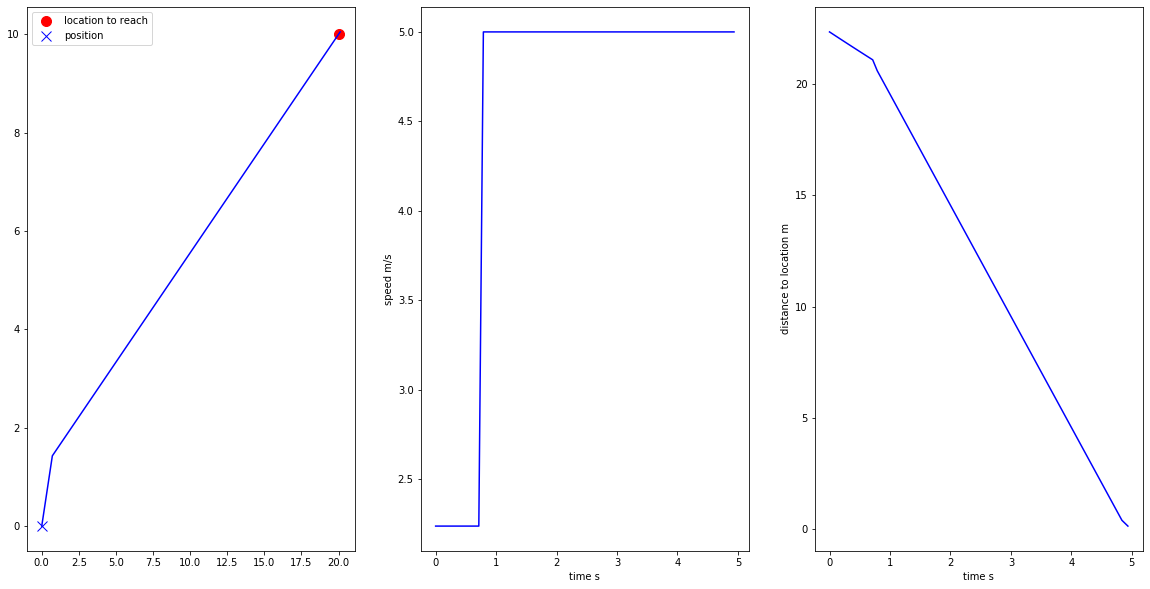

In [5]:
fig,ax=print_path()

## Using equations of motion <a name="improved_approx"></a>

In his [paper](/Users/gabin/Ordinateur/Documents/Informatique/ressources/football/off_the_ball_scoring_opportunities.pdf), Spearman explains that he calculates arrival time by solving player's equation of motion assuming they are able to accelerate with some constant acceleration a to a maximum speed v. But he doesn't detail the procedure to do it. In a precedent basketball study, we calculated this time for basketball players withtout bounding their velocity as we calculated this time on small move [Characterization of Space and Time Dependence of 3-point Shots](http://www.sloansportsconference.com/wp-content/uploads/2020/02/Rolland_characterization_of_Space_and_Time-Dependece_of_3-Point_Shots_in_Basketball.pdf). Inspired by [this article](https://onlinelibrary.wiley.com/doi/abs/10.1002/scj.20254) I tried to detail the calculation with a resistive force to take into account that soccer players have bounded velocities.

### Calculation

We want to determine the time it takes for a player at a given position $(x_0,y_0)$ and with a given speed $(v_{x0},v_{y0})$ to reach the point $(x,y)$ assuming that the player's speed is bounded by $v_max$

We will consider that the player will use a constant acceleration in given direction of magnitude $|a|^2=a_x^2 + a_y^2$.

Newton's law write :

\begin{equation}
    m\frac{d \vec{v}}{dt} = m\vec{a} - k\vec{v}
    \label{eq:1} \tag{1}
\end{equation}

In one dimension, the solution of this equation is 

\begin{equation}
    v_x=v_{xmax}-(v_{xmax}-v_{x0})\exp(-\alpha t)\\
    \label{eq:2} \tag{2}
\end{equation}

with $v_{xmax}=\frac{ma_x}{k}$ and $\alpha=\frac{k}{m}=\frac{a_x}{v_{xmax}}$. We have for x :

\begin{equation}
    x=x_0+v_{xmax}(t-\frac{1-\exp{-\alpha t}}{\alpha})+(\frac{1-\exp{-\alpha t}}{\alpha})v_{x0}\\
    \label{eq:3} \tag{3}
\end{equation}

Analoguous expressions are write for y to obtain

\begin{equation}
    y=y_0+v_{ymax}(t-\frac{1-\exp{-\alpha t}}{\alpha})+(\frac{1-\exp{-\alpha t}}{\alpha})v_{y0}\\
    \label{eq:4} \tag{4}
\end{equation}

In these expressions the unknowns are t, $v_{xmax}$ and $v_{ymax}$ with $v_{xmax}$ and $v_{ymax}$ verifying 

\begin{equation}
    v_{max}^2=v_{xmax}^2 + v_{ymax}^2
    \label{eq:5} \tag{5}
\end{equation}

Therefore we have a system of three equations with three unknowns. Let's solve it with the function fslove from scipy.optimize assuming that $v_{max}=5m/s$ and $a=7m/s^2$ as Spearman suggests
   


In [6]:
from scipy.optimize import fsolve
import numpy as np

def improved_time_to_reach_location(X0=np.array([0,0]),Xf=np.array([20,10]),V0=np.array([1,2]),vmax=5,amax=7):
    
    alpha = amax/vmax

    def equations(p):
        vxmax, vymax, t = p
        eq1 = Xf[0] - (X0[0] + vxmax*(abs(t) - (1 - np.exp(-alpha*abs(t)))/alpha)+((1 - np.exp(-alpha*abs(t)))/alpha)*V0[0])
        eq2 = Xf[1] - (X0[1] + vymax*(abs(t) - (1 - np.exp(-alpha*abs(t)))/alpha)+((1 - np.exp(-alpha*abs(t)))/alpha)*V0[1])
        eq3 = np.sqrt(vxmax**2+vymax**2) - vmax
        return (eq1,eq2,eq3)
    
    t_predict=np.linalg.norm(Xf-X0)/vmax+0.7
    v_predict=vmax*(Xf-X0)/np.linalg.norm(Xf-X0)
    vxmax, vymax, t =  fsolve(equations, (v_predict[0], v_predict[1], t_predict))

    return(vxmax, vymax, abs(t))

#vxmax,vymax,tf=improved_time_to_reach_location()

In [7]:
def print_path_2(location=np.array([20,10]),position=np.array([0,0]),amax=7,vmax=5,velocity=np.array([1,2]),figax=None,nb_points=100,color='blue'):
    
    if figax==None:
        fig,ax=plt.subplots(1,3,figsize=(20,10))
        ax[0].plot(location[0],location[1], 'ro',label='location to reach',markersize=10)
        ax[0].plot(position[0],position[1], 'bx',label='position',markersize=10)
        ax[1].set_ylabel('speed m/s')
        ax[1].set_xlabel('time s')
        ax[2].set_ylabel('distance to location m')
        ax[2].set_xlabel('time s')
        ax[0].legend()
    else:
        fig,ax=figax
        
    vxmax,vymax,tf=improved_time_to_reach_location(Xf=location,X0=position,amax=amax,vmax=vmax,V0=velocity)
    print('time to reach location :',tf)
    
    alpha = amax/vmax
    dt=tf/nb_points
    lx=[position[0]]
    ly=[position[1]]
    speed=[np.linalg.norm(velocity)]
    distance_to_location=[np.linalg.norm(location-np.array([lx[-1],ly[-1]]))]
    t=dt
    
    for i in range(nb_points):
        x=position[0] + vxmax*(t - (1 - np.exp(-alpha*t))/alpha)+((1 - np.exp(-alpha*t))/alpha)*velocity[0]
        y=position[1] + vymax*(t - (1 - np.exp(-alpha*t))/alpha)+((1 - np.exp(-alpha*t))/alpha)*velocity[1]
        
        vx=vxmax-(vxmax-velocity[0])*np.exp(-alpha*t)
        vy=vymax-(vymax-velocity[0])*np.exp(-alpha*t)
        
        speed.append(np.sqrt(vx**2+vy**2))
        lx.append(x)
        ly.append(y)
        
        distance=np.linalg.norm(location-np.array([lx[-1],ly[-1]]))
        distance_to_location.append(distance)
 
        t=t+dt
    
    vx=vxmax-(vxmax-velocity[0])*np.exp(-alpha/alpha)
    vy=vymax-(vymax-velocity[0])*np.exp(-alpha/alpha)
    print('% of vmax at reaction time: ',np.sqrt(vx**2+vy**2)/vmax)
        
    time=[i*dt for i in range(nb_points+1)]
    ax[0].plot(lx,ly,color)
    ax[1].plot(time,speed,color)
    ax[2].plot(time,distance_to_location,color)
    
    return(fig,ax)

## Compare both model

### Short distance

time to reach location : 0.6613979308165843
% of vmax at reaction time:  0.6321205588276125
simple time to reach location : 0.9222888539794434


(<Figure size 1440x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x101c702190>,
       dtype=object))

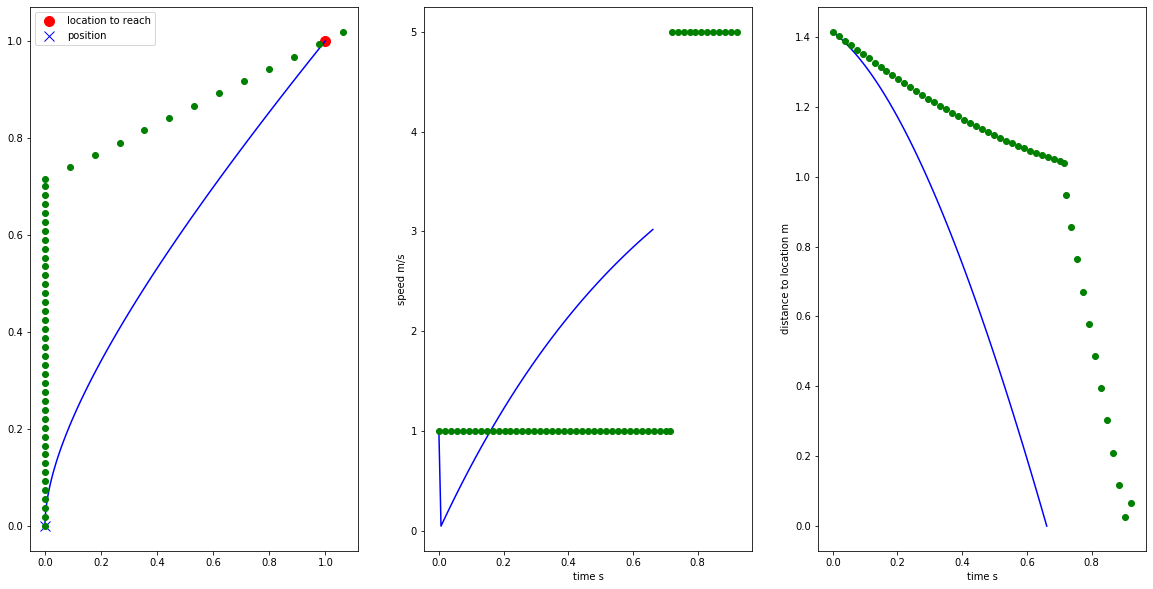

In [10]:
fig,ax=print_path_2(location=np.array([1,1]),velocity=np.array([0,1]))
print_path(location=np.array([1,1]),figax=(fig,ax),color='go',velocity=np.array([0,1]))

### Long distance

time to reach location : 20.714795911859767
% of vmax at reaction time:  0.7090515629956984
simple time to reach location : 20.71479591185981


(<Figure size 1440x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x101cadfe50>,
       dtype=object))

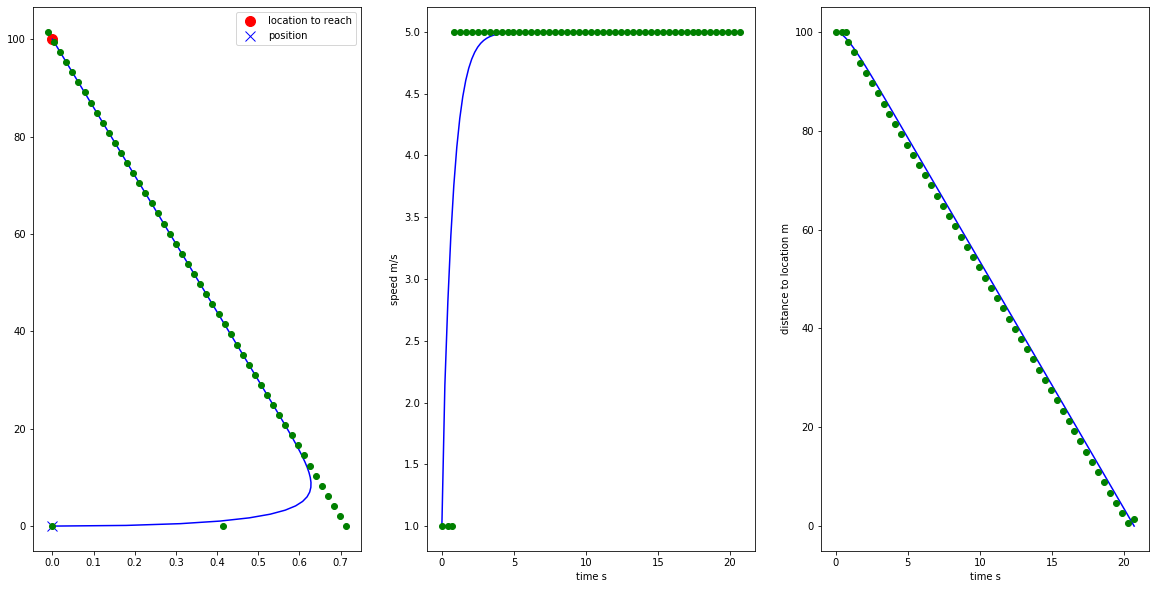

In [11]:
fig,ax=print_path_2(location=np.array([0,100]),velocity=np.array([1,0]))
print_path(location=np.array([0,100]),figax=(fig,ax),color='go',velocity=np.array([1,0]))

The methods seem equivalent for long distances but differ for short distances. Let's experiment over different distances with different initial speeds for a player in (0,0) 

### Difference time by distances and initial speeds

In [20]:
vmax=5
location=[np.array([0,1]),np.array([0,2]),np.array([0,3]),np.array([0,5]),np.array([0,7]),np.array([0,10]),np.array([0,15]),np.array([0,20]),np.array([0,30]),np.array([0,50]),np.array([0,100])]
speed=[vmax*np.array([0,0]),
       vmax*np.array([0,1]),vmax*np.array([1,0]),vmax*np.array([0,-1]), #vmax on different directions
       0.5*vmax*np.array([0,1]),0.5*vmax*np.array([1,0]),0.5*vmax*np.array([0,-1]), #0.5vmax on different directions
       0.25*vmax*np.array([0,1]),0.25*vmax*np.array([1,0]),0.25*vmax*np.array([0,-1])
      ]
distance=[]
simple_time=[]
improved_time=[]
locations_df=[]
speed_type=[]
speed_norm=[]
for loc in location:
    for s in speed:
        locations_df.append(loc)
        speed_norm.append(np.linalg.norm(s))
        if s[0]!=0:
            speed_type.append('perpendicular')
        else:
            if s[1]<0:
                speed_type.append('opposed')
            else:
                if s[1]>0:
                    speed_type.append('same')
                else:
                    speed_type.append('zero')
        
        distance.append(np.linalg.norm(loc))
        simple_time.append(simple_time_to_reach_location(location=loc,velocity=s))
        improved_time.append(improved_time_to_reach_location(Xf=loc,V0=s)[2])
        
data=pd.DataFrame([locations_df,speed_type,speed_norm,distance,simple_time,improved_time]).T
data.columns=['locations','speed_type','speed_norm','distance','simple_time','improved_time']
        

In [21]:
data['diff_time']=data['simple_time']-data['improved_time']

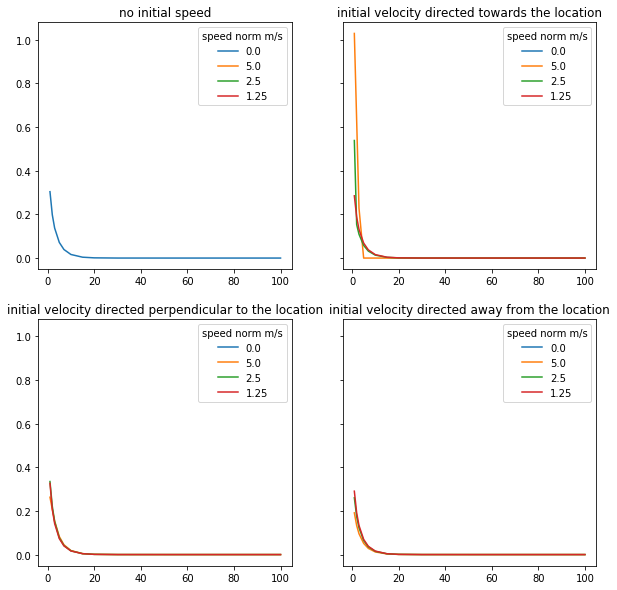

In [64]:
fig,ax=plt.subplots(2,2,figsize=(10,10),sharey=True)
titles=['no initial speed','initial velocity directed towards the location','initial velocity directed perpendicular to the location','initial velocity directed away from the location']
for i,s_type in enumerate(data.speed_type.unique()):
    for s_norm in data.speed_norm.unique():
        x=data.query('speed_type==@s_type and speed_norm==@s_norm')['distance']
        y=data.query('speed_type==@s_type and speed_norm==@s_norm')['diff_time']
        ax[i//2][i%2].plot(x,y,label=s_norm)
    ax[i//2][i%2].set_title(titles[i])
    ax[i//2][i%2].legend(title='speed norm m/s')
    #data.query('speed_type==@s_type').groupby('speed_norm').plot(x='distance',y='diff_time',subplots=True,ax=ax[i//2][i%2],label='speed_norm')

The initial speed only influences the final time difference if it is in the direction of the finish point. **Overall, the difference between the two models is only significant for distances of less than 10 metres.**

It is possible to find this result mathematically by looking at the behaviour of the equations as a function of the ratio between $t_f$ and $\frac{1}{\alpha}$. 

### Compare calculation time

In [65]:
import timeit

mysetup = '''
import numpy as np
from scipy.optimize import fsolve
'''

simple_time='''
def simple_time_to_reach_location(location=np.array([20,10]),position=np.array([0,0]),amax=7,vmax=5,velocity=np.array([1,2])):
    
    reaction_time=vmax/amax
    
    r_reaction = position + velocity*reaction_time
    arrival_time = reaction_time + np.linalg.norm(location-r_reaction)/vmax

    return(arrival_time)
'''

improved_time='''
def improved_time_to_reach_location(X0=np.array([0,0]),Xf=np.array([20,10]),V0=np.array([1,2]),vmax=5,amax=7):
    
    alpha = amax/vmax

    def equations(p):
        vxmax, vymax, t = p
        eq1 = Xf[0] - (X0[0] + vxmax*(abs(t) - (1 - np.exp(-alpha*abs(t)))/alpha)+((1 - np.exp(-alpha*abs(t)))/alpha)*V0[0])
        eq2 = Xf[1] - (X0[1] + vymax*(abs(t) - (1 - np.exp(-alpha*abs(t)))/alpha)+((1 - np.exp(-alpha*abs(t)))/alpha)*V0[1])
        eq3 = np.sqrt(vxmax**2+vymax**2) - vmax
        return (eq1,eq2,eq3)
    
    t_predict=np.linalg.norm(Xf-X0)/vmax+0.7
    v_predict=vmax*(Xf-X0)/np.linalg.norm(Xf-X0)
    vxmax, vymax, t =  fsolve(equations, (v_predict[0], v_predict[1], t_predict))

    return(vxmax, vymax, abs(t))
'''
print('calculation time with simple time : ',timeit.timeit(simple_time,setup =mysetup ,number=1000),'\n',
      'calculation time with improved time : ',timeit.timeit(improved_time,setup =mysetup ,number=1000))

calculation time with simple time :  0.004096254999694793 
 calculation time with improved time :  0.004651769000247441


The calculation times between the two models are very similar, so it will be more judicious to **use the model using the equations of motion** because it is closer to reality for short distances with a similar calculation time.

## Discussion of speed and acceleration values <a name="speed-discussion"></a>

As said before, Spearman suggests that values of $v$ and $a$ be set at $5m/s$ and $7m/s^2$. Let's test these values over a distance we know well, i.e. 100m. 

time to reach location : 20.714285714285534
% of vmax at reaction time:  0.6321205588285577


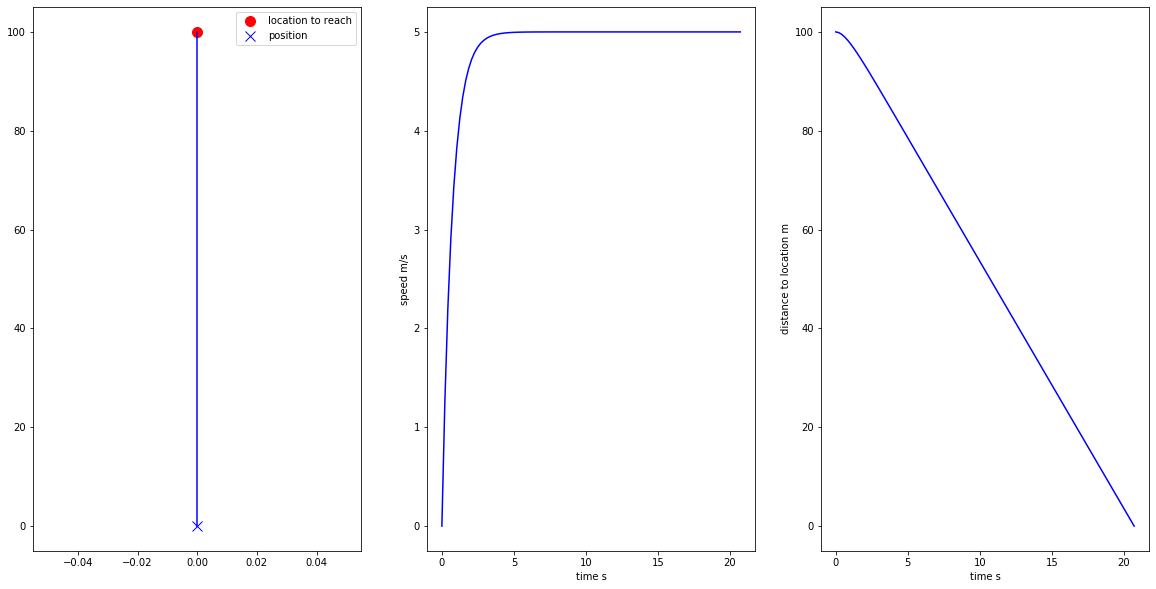

In [66]:
fig,ax=print_path_2(location=np.array([0,100]),velocity=np.array([0,0]))

We observe that the time to cover 100m in a straight line, without initial speed, assuming that the player accelerates with his maximum acceleration a up to his maximum speed v, is 20 sec. **That's a very high quantity for a top athlete.**

In [this article](https://onlinelibrary.wiley.com/doi/abs/10.1002/scj.20254), they suggest that the values of $v$ and $\alpha$ should be set at $7.8m/s$ and $1.3s^{-1}$ soit $a=v*\alpha=10.14m/s^2$

Let's test with these new values

time to reach location : 13.589743573393475
% of vmax at reaction time:  0.6321205588285577


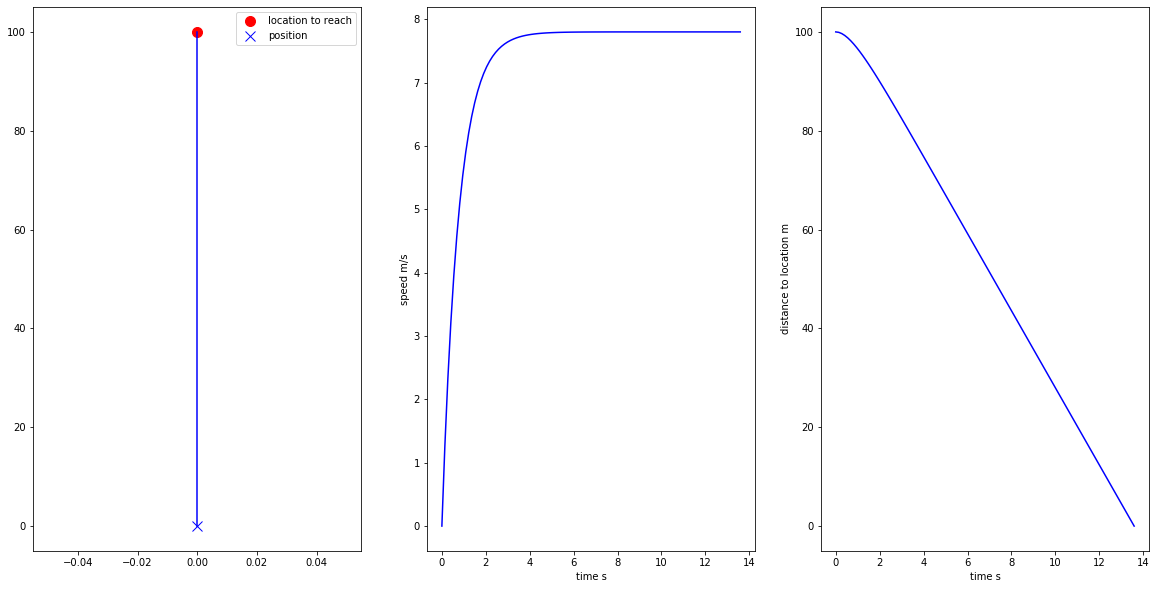

In [69]:
fig,ax=print_path_2(location=np.array([0,100]),velocity=np.array([0,0]),amax=10.14,vmax=7.8)

13.58 seconds seems to be more consistent with what we know. Players are surely able to run the 100m faster but we must not forget that they are on a football pitch, the dynamics are different and the players are not in conditions to reach their maximum speed at every moment.

Moreover, according to [this study](https://www.researchgate.net/publication/309232669_Maximal_Sprinting_Speed_of_Elite_Soccer_Players_During_Training_And_Matches), on average, professional football players reach a maximum speed of 28.6 km/h during a match, i.e. about 7.9 m/s which corresponds to the previous value.